<a href="https://colab.research.google.com/github/eldertec/postgraduate-in-development-full-stack/blob/master/Modulo-ML/Aula02/trabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyyaml h5py

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import re
import random
import cv2

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [0]:
cats_tr = os.listdir(train_cats_dir)
dogs_tr = os.listdir(train_dogs_dir)

cats_val = os.listdir(validation_cats_dir)
dogs_val = os.listdir(validation_dogs_dir)

cats_tr = [os.path.join(train_cats_dir, x) for x in cats_tr]
dogs_tr = [os.path.join(train_dogs_dir, x) for x in dogs_tr]
cats_val = [os.path.join(validation_cats_dir, x) for x in cats_val]
dogs_val = [os.path.join(validation_dogs_dir, x) for x in dogs_val]

total_train = cats_tr + dogs_tr
total_val = cats_val + dogs_val

In [0]:
random.shuffle(total_train)
X_train = np.zeros((len(total_train), 224, 224, 3)).astype('float')
y_train = []
for i, img_path in enumerate(total_train):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X_train[i] = img
    if len(re.findall('dog', img_path)) == 3:
        y_train.append(0)
    else: 
        y_train.append(1)
y_train = np.array(y_train)

In [0]:
random.shuffle(total_val)
X_test = np.zeros((len(total_val), 224, 224, 3)).astype('float')
y_test = []
for i, img_path in enumerate(total_val):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X_test[i] = img
    if len(re.findall('dog', img_path)) == 3:
        y_test.append(0)
    else: 
        y_test.append(1)
y_test = np.array(y_test)

In [0]:
batch_size = 32
epochs = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [0]:
def create_model(base_model):
    base_model.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

def fit_model(model):
    history = model.fit(
                        X_train, y_train,
                        batch_size=batch_size,
                        steps_per_epoch=len(total_train) // batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        validation_steps=len(total_val) // batch_size
                        )
    return history

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [11]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
base_model1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model2 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

modelo1 = create_model(base_model1)
modelo2 = create_model(base_model2)
modelo3 = create_model(base_model3)

print('MobileNetV2:')
history1 = fit_model(modelo1)
modelo1.save('modelo1.h5')
print('InceptionV3:')
history2 = fit_model(modelo2)
modelo2.save('modelo2.h5')
print('Xception:')
history3 = fit_model(modelo3)
modelo3.save('modelo3.h5')

MobileNetV2:
Epoch 1/20
62/62 [==============================] - 12s 187ms/step - loss: 0.5453 - accuracy: 0.9229 - val_loss: 0.6755 - val_accuracy: 0.7026
Epoch 2/20
62/62 [==============================] - 11s 170ms/step - loss: 0.5102 - accuracy: 0.9888 - val_loss: 0.5622 - val_accuracy: 0.8901
Epoch 3/20
62/62 [==============================] - 11s 170ms/step - loss: 0.5062 - accuracy: 0.9949 - val_loss: 0.5743 - val_accuracy: 0.8831
Epoch 4/20
62/62 [==============================] - 11s 170ms/step - loss: 0.5061 - accuracy: 0.9949 - val_loss: 0.5681 - val_accuracy: 0.8911
Epoch 5/20
62/62 [==============================] - 10s 168ms/step - loss: 0.5030 - accuracy: 0.9990 - val_loss: 0.5490 - val_accuracy: 0.9244
Epoch 6/20
62/62 [==============================] - 10s 169ms/step - loss: 0.5070 - accuracy: 0.9990 - val_loss: 0.5556 - val_accuracy: 0.9143
Epoch 7/20
62/62 [==============================] - 10s 168ms/step - loss: 0.5027 - accuracy: 0.9980 - val_loss: 0.5331 - val_acc

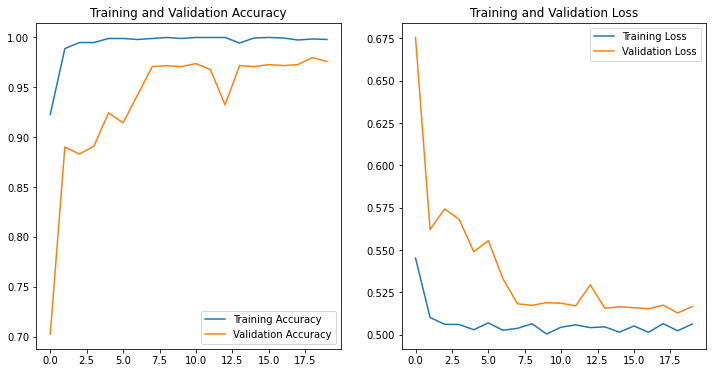

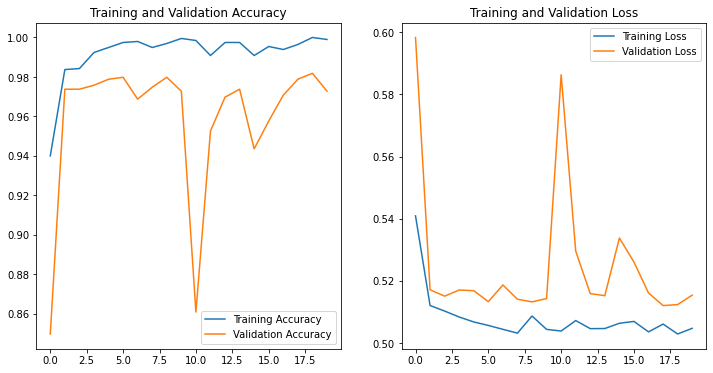

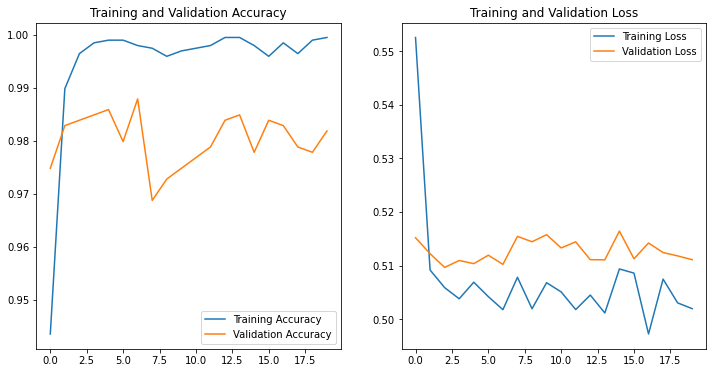

In [12]:
plot_history(history1)
plot_history(history2)
plot_history(history3)

In [0]:
def load_all_models():
    all_models = []
    model_names = ['modelo1.h5', 'modelo2.h5', 'modelo3.h5']
    for model_name in model_names:
        model = tf.keras.models.load_model(model_name)
        all_models.append(model)
        print('loaded:', model_name)
    return all_models

In [0]:
def ensemble_model(models):
    for i, model in enumerate(models):
        for layer in model.layers:
            layer.trainable = False
    ensemble_visible = [model.input for model in models]
    ensemble_outputs = [model.output for model in models]
    merge = tf.keras.layers.concatenate(ensemble_outputs)
    merge = tf.keras.layers.Dense(10, activation='relu')(merge)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(merge)
    model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

In [15]:
models = load_all_models()
model = ensemble_model(models)

loaded: modelo1.h5
loaded: modelo2.h5
loaded: modelo3.h5


In [0]:
X = [X_train for _ in range(len(model.input))]
X_1 = [X_test for _ in range(len(model.input))]

In [17]:
epochs = 20
history = model.fit(X, y_train,
                    batch_size=batch_size,
                    steps_per_epoch=len(total_train) // batch_size,
                    epochs=epochs,
                    validation_data=(X_1, y_test),
                    validation_steps=len(total_val) // batch_size
                    )

Epoch 1/20
62/62 [==============================] - 18s 285ms/step - loss: 0.6799 - accuracy: 0.9960 - val_loss: 0.6658 - val_accuracy: 0.9637
Epoch 2/20
62/62 [==============================] - 15s 236ms/step - loss: 0.6509 - accuracy: 0.9985 - val_loss: 0.6397 - val_accuracy: 0.9698
Epoch 3/20
62/62 [==============================] - 15s 236ms/step - loss: 0.6232 - accuracy: 0.9990 - val_loss: 0.6185 - val_accuracy: 0.9718
Epoch 4/20
62/62 [==============================] - 15s 234ms/step - loss: 0.6020 - accuracy: 0.9995 - val_loss: 0.5997 - val_accuracy: 0.9768
Epoch 5/20
62/62 [==============================] - 15s 235ms/step - loss: 0.5850 - accuracy: 1.0000 - val_loss: 0.5828 - val_accuracy: 0.9788
Epoch 6/20
62/62 [==============================] - 15s 240ms/step - loss: 0.5681 - accuracy: 1.0000 - val_loss: 0.5685 - val_accuracy: 0.9798
Epoch 7/20
62/62 [==============================] - 15s 239ms/step - loss: 0.5529 - accuracy: 1.0000 - val_loss: 0.5569 - val_accuracy: 0.9829

In [0]:
model.save('modeloFinal.h5')

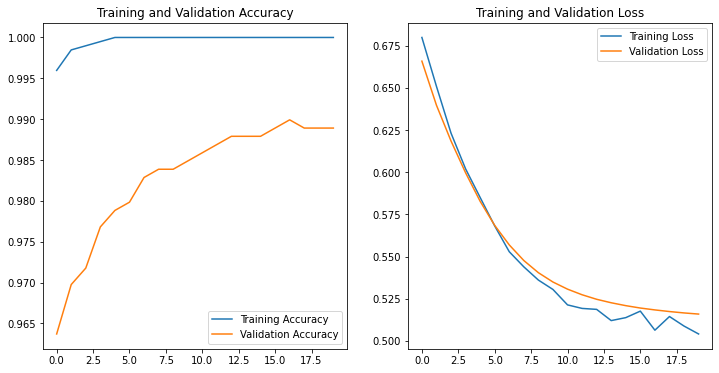

In [19]:
plot_history(history)

In [37]:
print('Acurácia do MobileNetV2: %.2f' % (history1.history['val_accuracy'][-1] * 100), '%')
print('Acurácia do InceptionV3: %.2f' % (history2.history['val_accuracy'][-1] * 100), '%')
print('Acurácia do Xception: %.2f' % (history3.history['val_accuracy'][-1] * 100), '%')
print('Acurácia do Ensemble: %.2f' % (history.history['val_accuracy'][-1] * 100), '%')

Acurácia do MobileNetV2: 97.58 %
Acurácia do InceptionV3: 97.28 %
Acurácia do Xception: 98.19 %
Acurácia do Ensemble: 98.89 %
